In [174]:
#will import all libraries and variables I need
%run ~/github/research/programs/make_plots.py

/Users/k215c316/github/research/programs/make_plots.py:436: RuntimeWarning: invalid value encountered in true_divide
  
/Users/k215c316/github/research/programs/make_plots.py:436: RuntimeWarning: invalid value encountered in log10
  


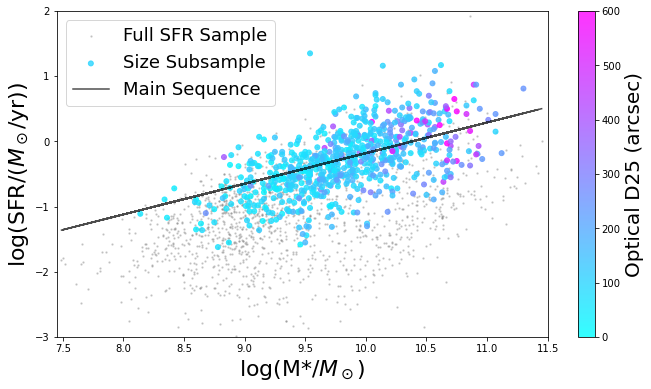

In [175]:
sfr_mstar(trimgray=True,savefig=True)

-----

In [60]:
#filtering out galaxies with error flags and Sersic indices > 6

sgacut = sgacut[t2_error]
sgacut = sgacut[sersic_flag_t2]

envcut = envcut[t2_error]
envcut = envcut[sersic_flag_t2]

hyp = hyp[t2_error]
hyp = hyp[sersic_flag_t2]

mgs = mgs[t2_error]
mgs = mgs[sersic_flag_t2]

vf = vf[t2_error]
vf = vf[sersic_flag_t2]

In [64]:
logmstar = mgs['logmass']
logsfr = mgs['logsfr']

In [67]:
clus_mass = logmstar[cluster_free]
rg_mass = logmstar[rg_all_free]
fil_mass = logmstar[filament_free]
pg_mass = logmstar[pg_free]
field_mass = logmstar[field_free]

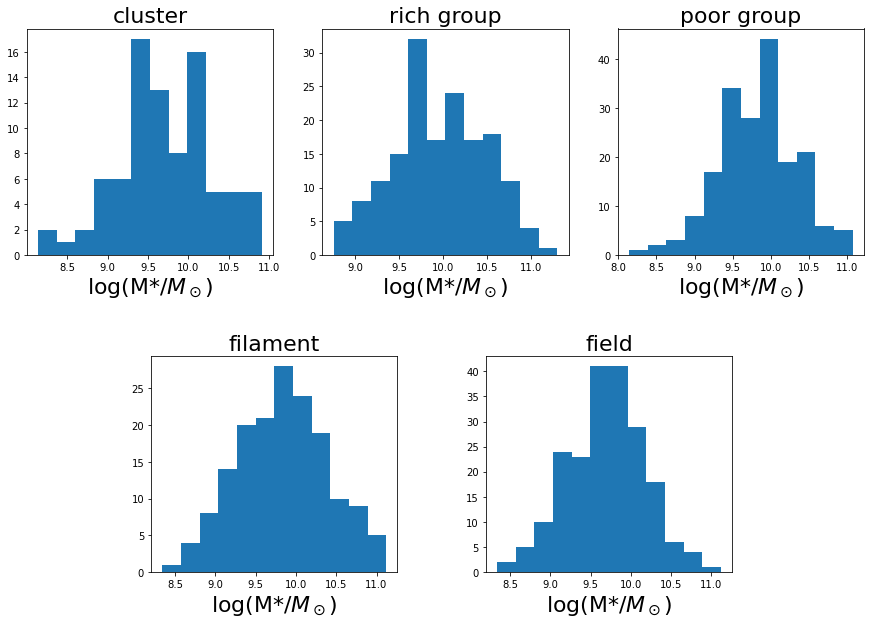

In [166]:
env_mass = [clus_mass,rg_mass,pg_mass,fil_mass,field_mass]
env_names = ['cluster','rich group','poor group','filament','field']

fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=.4,wspace=.2)
for i in range(1,6):
        ax=fig.add_subplot(2,3,i)
        if i == 4:
            ax.set_position([0.24,0.125,0.228,0.3])
        if i == 5:
            ax.set_position([0.55,0.125,0.228,0.3])
        plt.hist(env_mass[i-1],bins=12)
        plt.xlabel(r'log(M*/$M_\odot$)',fontsize=22)
        plt.title(env_names[i-1],fontsize=22)

plt.savefig('mstar_env_hist.png', dpi=300)
#spacing idea from https://stackoverflow.com/questions/26767281/position-5-subplots-in-matplotlib

In [147]:
from scipy.stats import kstest

In [161]:
print('p-values (> 5e-2, "same distribution"):')
print(' ')
print('rg vs. cluster:','%.3e'%(kstest(rg_mass,clus_mass)[1]))
print('pg vs. cluster:','%.3e'%(kstest(pg_mass,clus_mass)[1]))
print('filament vs. cluster:','%.3e'%(kstest(fil_mass,clus_mass)[1]))
print('field vs. cluster:','%.3e'%(kstest(field_mass,clus_mass)[1]))
print(' ')
print('rg vs. field:','%.3e'%(kstest(rg_mass,field_mass)[1]))
print('pg vs. field:','%.3e'%(kstest(pg_mass,field_mass)[1]))
print('filamentvs. field:','%.3e'%(kstest(fil_mass,field_mass)[1]))
print('cluster vs. field:','%.3e'%(kstest(clus_mass,field_mass)[1]))

p-values (< 5e-2, "same distribution"):
 
rg vs. cluster: 8.765e-03
pg vs. cluster: 2.541e-01
filament vs. cluster: 3.175e-01
field vs. cluster: 4.151e-01
 
rg vs. field: 1.931e-05
pg vs. field: 1.160e-01
filamentvs. field: 6.498e-02
cluster vs. field: 4.151e-01


-----

In [186]:
#general Virgo v2 table
vf_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_main.fits')
#general Virgo v2 env table
env_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')

#vf_full = Table.read(homedir+'/Desktop/v1-20210308/vf_north_v1_main.fits')

In [138]:
#divide subsample into environments
vf_cluster = vf[cluster_free]
vf_rg = vf[rg_free]   #only galaxies in rich groups --> not in filaments, etc.
vf_fil = vf[filament_free]
vf_pg = vf[pg_free]
vf_field = vf[field_free]

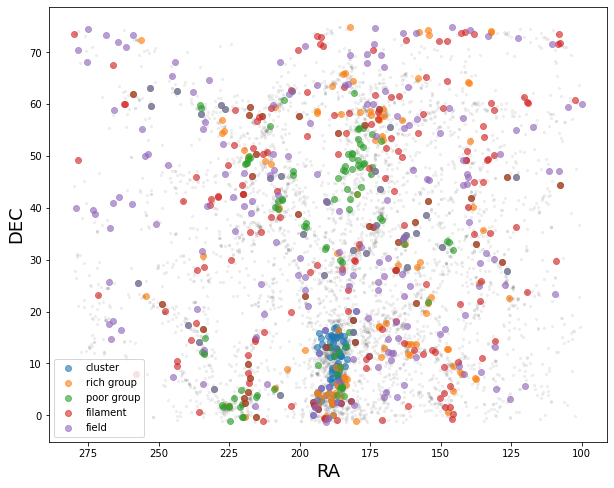

In [183]:
vf_env = [vf_cluster,vf_rg,vf_fil,vf_pg,vf_field]
vf_label = ['cluster','rich group','poor group','filament','field']

plt.figure(figsize=(10,8))
plt.scatter(vf_full['RA'],vf_full['DEC'],s=5,alpha=0.1,color='gray')
plt.gca().invert_xaxis()
plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)
for i in range(0,len(vf_env)):
    plt.scatter(vf_env[i]['RA'],vf_env[i]['DEC'],label=vf_label[i],alpha=0.6)
plt.legend()

#plt.savefig()

In [185]:
#above is a bit too clunky. perhaps a dummy example will do.

In [314]:
rg_flag = (env_full['rich_group_memb'])
rg_coord_flag = ((vf_full['RA']>210) & (vf_full['DEC']<5))
rg_flag_all = (rg_flag) & (rg_coord_flag)
vf_rgcoord = vf_full[rg_flag_all]

pg_flag = (env_full['poor_group_memb'])
pg_coord_flag = ((vf_full['RA']>185) & (vf_full['RA']<200) & (vf_full['DEC']>68))
pg_flag_all = (pg_flag) & (pg_coord_flag)
vf_pgcoord = vf_full[pg_flag_all]

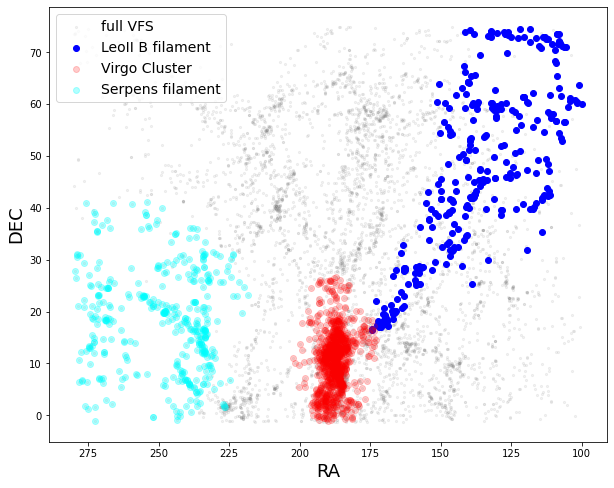

In [321]:
plt.figure(figsize=(10,8))
plt.scatter(vf_full['RA'],vf_full['DEC'],s=5,alpha=0.1,color='gray',label='full VFS')
plt.scatter(vf_full[(env_full['filament'] == 'LeoII_B')]['RA'],
            vf_full[(env_full['filament'] == 'LeoII_B')]['DEC'],
            color='blue',label='LeoII B filament')
plt.scatter(vf_full[(env_full['cluster_member'])]['RA'],vf_full[(env_full['cluster_member'])]['DEC'],alpha=0.2,
           label='Virgo Cluster',color='red')
#plt.scatter(vf_rgcoord['RA'],vf_rgcoord['DEC'],label='rich group',color='green')
#plt.scatter(vf_pgcoord['RA'],vf_pgcoord['DEC'],label='poor group',color='orange')
plt.scatter(vf_full[(env_full['filament'] == 'Serpens')]['RA'],
            vf_full[(env_full['filament'] == 'Serpens')]['DEC'],
            color='cyan',alpha=0.3,label='Serpens filament')
plt.gca().invert_xaxis()
plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)
plt.legend(fontsize=14)

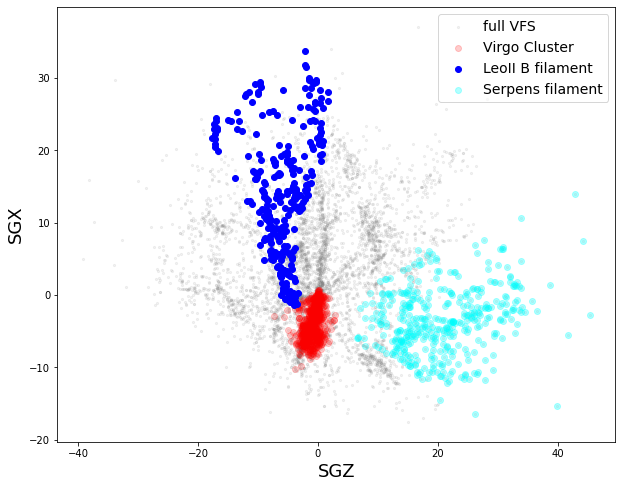

In [322]:
plt.figure(figsize=(10,8))
plt.scatter(env_full['SGZ'],env_full['SGX'],s=5,alpha=0.1,color='gray',label='full VFS')
plt.scatter(env_full[(env_full['cluster_member'])]['SGZ'],env_full[(env_full['cluster_member'])]['SGX'],alpha=0.2,
           label='Virgo Cluster',color='red')
plt.scatter(env_full['SGZ'][(env_full['filament'] == 'LeoII_B')],
            env_full['SGX'][(env_full['filament'] == 'LeoII_B')],color='blue',label='LeoII B filament')
#plt.scatter(env_full['SGZ'][rg_flag_all],env_full['SGX'][rg_flag_all],label='rich group',color='green')
#plt.scatter(env_full['SGZ'][pg_flag_all],env_full['SGX'][pg_flag_all],label='poor group',color='orange')
plt.scatter(env_full[(env_full['filament'] == 'Serpens')]['SGZ'],
            env_full[(env_full['filament'] == 'Serpens')]['SGX'],
            color='cyan',alpha=0.3,label='Serpens filament')

plt.ylabel('SGX',fontsize=18)
plt.xlabel('SGZ',fontsize=18)
plt.legend(fontsize=14,loc='upper right')

------------

In [1]:
#data analysis

Convolution:  False
No GALFIT data for 113 w3 galaxies and 113 r galaxies.
Total number of galaxies with GALFIT error flags: 8
Total number of galaxies: 702


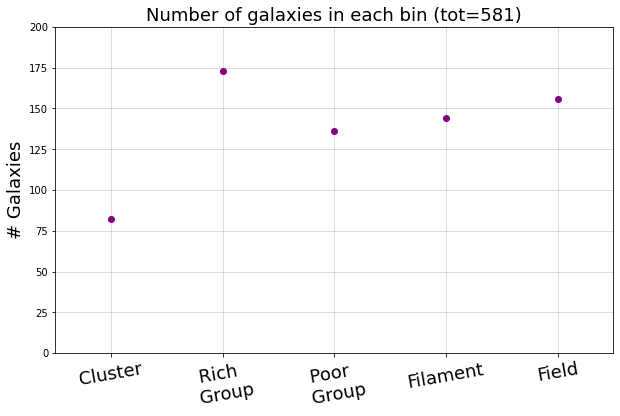

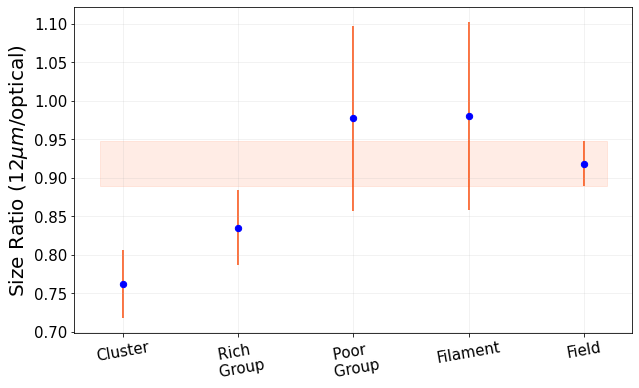

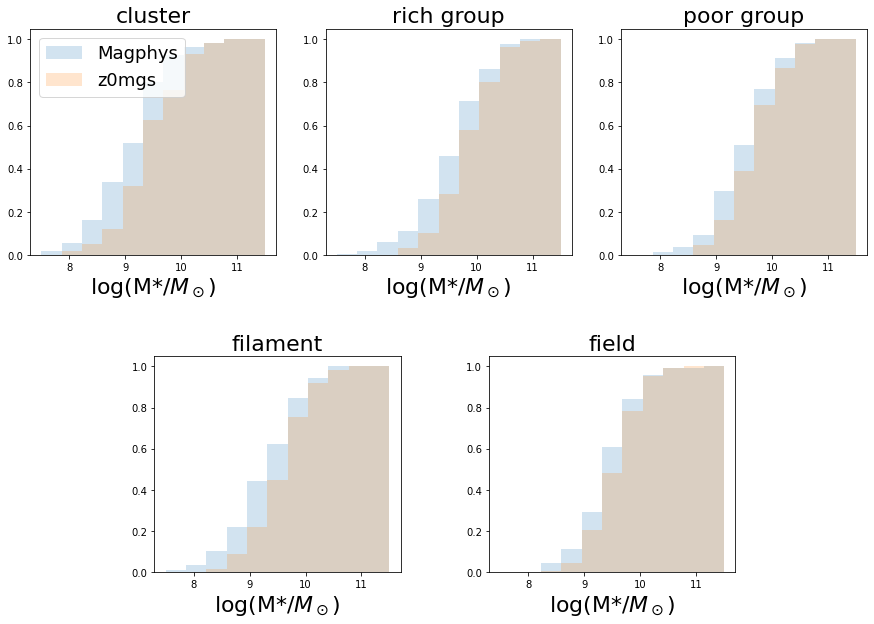

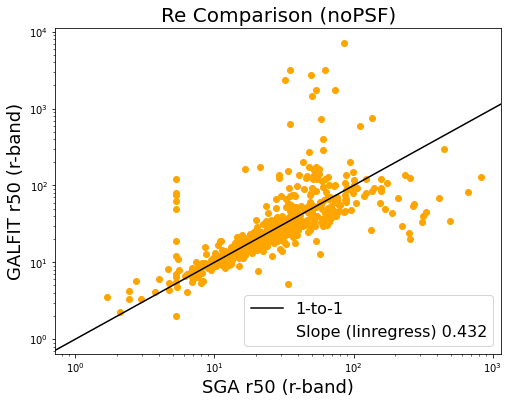

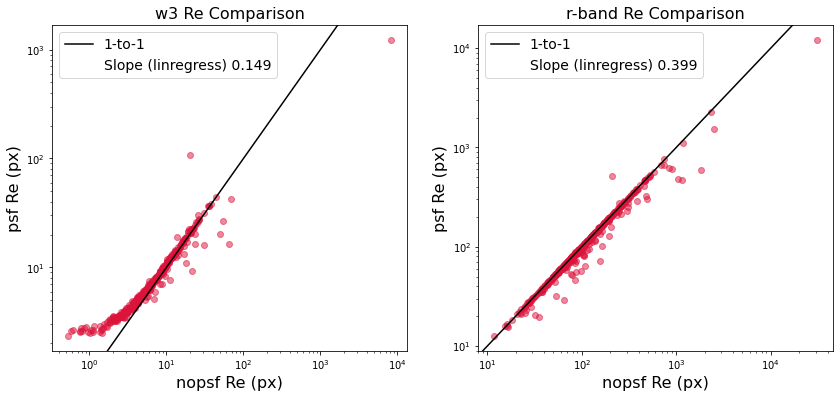

In [172]:
%run ~/github/research/data_analysis/re_analysis.py

#omits group galaxies (113)
#not run with masking
#not run with PSF implementation

#r-band background sources/foreground stars more pronounced in r-band, skewing effective radius to be
#more extended than in actuality..?

#stat mech assignment number 4
#WEBSITE ZEIT?!
#tkinter...what to potentially add to display_fits.py:
    #if fits is an r-mask image, resize widget?
    #experiment with '+' and '-' zoom button widgets; will zoom wherever used last clicked
    #ways to edit title, axes labels

In [104]:
#magphys[(magphys['magphysFlag'])&(magphys['logMstar']<-3)]

Convolution:  True
No GALFIT data for 113 w3 galaxies and 113 r galaxies.
Total number of galaxies with GALFIT error flags: 114
Total number of galaxies: 702


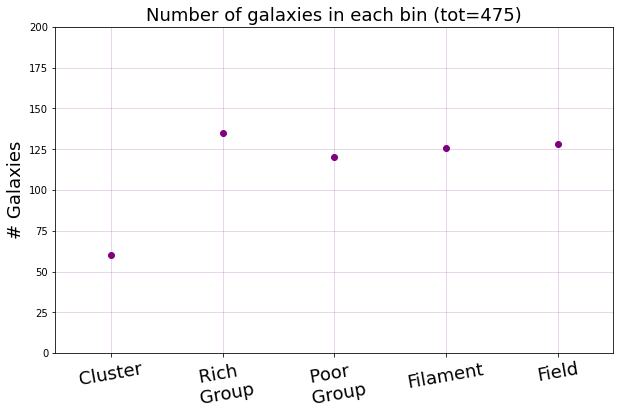

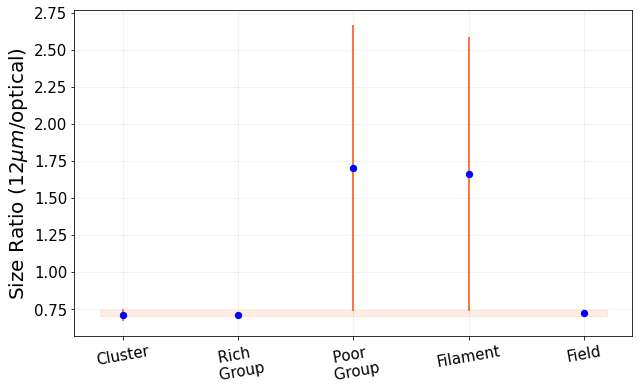

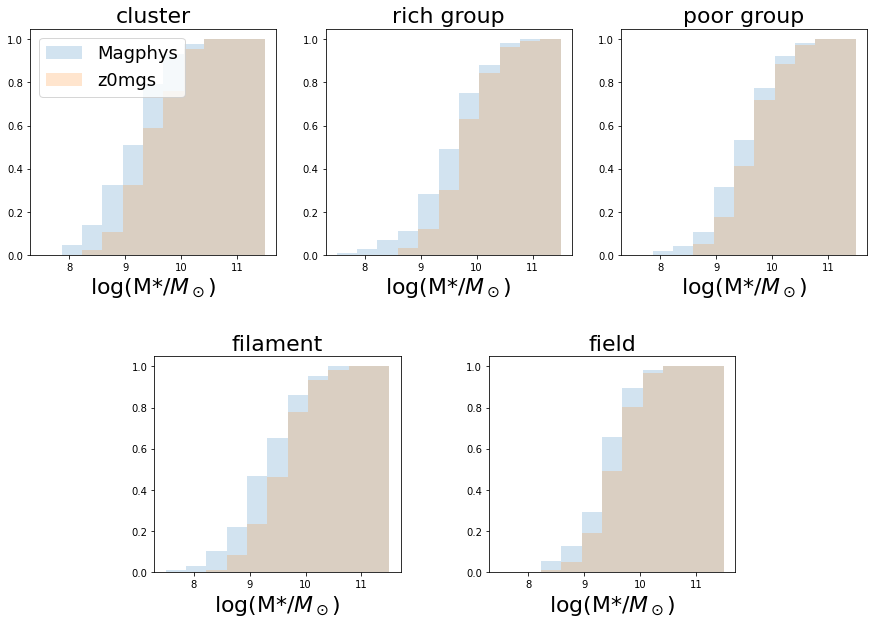

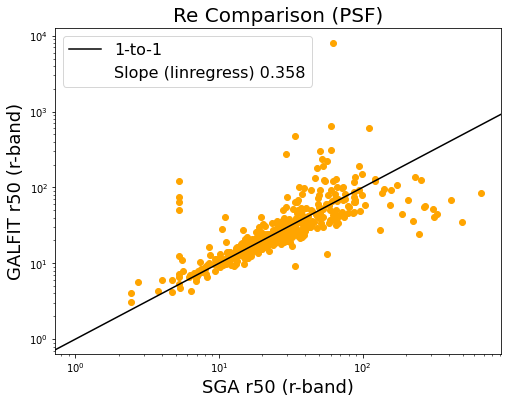

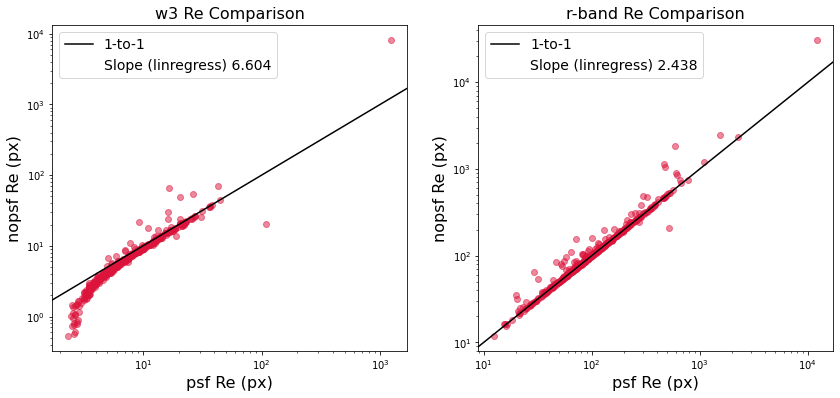

In [173]:
%run ~/github/research/data_analysis/re_analysis.py

In [106]:
from astropy.table import Table
import os
homedir=os.getenv("HOME")

r=Table.read(homedir+'/output_params_r_nopsf.fits')
w3=Table.read(homedir+'/output_params_w3_nopsf.fits')

magphys=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')

sgacut = Table.read(homedir+'/v2_snrcoadd.fits')